In [39]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from cassandra.cluster import Cluster

In [40]:
# Connect to Cassandra
cluster = Cluster(['cassandra'])
session = cluster.connect('oulad')  # connect to your keyspace

In [41]:

# Load the data from Cassandra
query = "SELECT * FROM student_info"
rows = session.execute(query)
student_info = pd.DataFrame(list(rows))

In [42]:
# Basic information about the dataset
print(student_info.info())
print(student_info.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31482 entries, 0 to 31481
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_student            31482 non-null  int64 
 1   code_module           31482 non-null  object
 2   code_presentation     31482 non-null  object
 3   age_band              31482 non-null  object
 4   disability            31482 non-null  object
 5   final_result          31482 non-null  object
 6   gender                31482 non-null  object
 7   has_withdrawn         31482 non-null  bool  
 8   highest_education     31482 non-null  object
 9   imd_band              31482 non-null  object
 10  num_of_prev_attempts  31482 non-null  int64 
 11  region                31482 non-null  object
 12  studied_credits       31482 non-null  int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 2.9+ MB
None
         id_student  num_of_prev_attempts  studied_credits
count  3.148200e+0

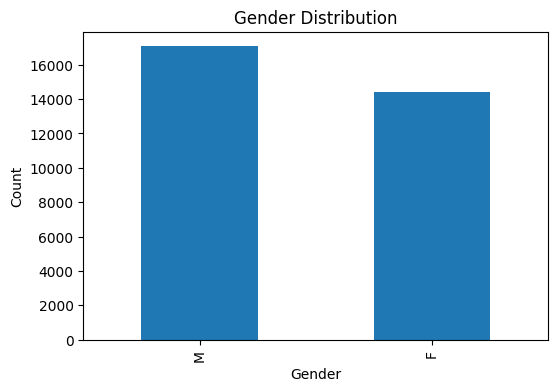

In [43]:
# Countplot of genders with labels
plt.figure(figsize=(6, 4))
student_info['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

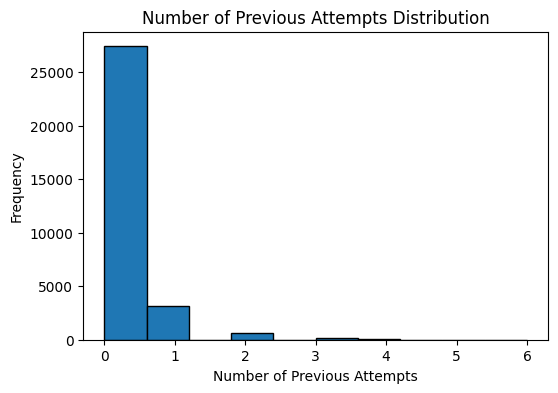

In [44]:
# Histogram for number of previous attempts
plt.figure(figsize=(6, 4))
student_info['num_of_prev_attempts'].plot(kind='hist', edgecolor='black')
plt.title('Number of Previous Attempts Distribution')
plt.xlabel('Number of Previous Attempts')
plt.show()

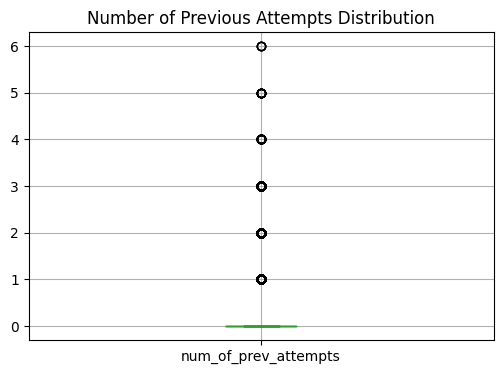

In [45]:
# Boxplot for number of previous attempts
plt.figure(figsize=(6, 4))
student_info.boxplot(column=['num_of_prev_attempts'])
plt.title('Number of Previous Attempts Distribution')
plt.show()

In [46]:
# Analysis of withdrawn students
withdrawn_students = student_info[student_info['has_withdrawn'] == True]
print(withdrawn_students.describe())

         id_student  num_of_prev_attempts  studied_credits
count  9.920000e+03           9920.000000      9920.000000
mean   7.090140e+05              0.186895        91.426915
std    5.488056e+05              0.514876        46.848968
min    3.733000e+03              0.000000        30.000000
25%    5.099835e+05              0.000000        60.000000
50%    5.917840e+05              0.000000        60.000000
75%    6.484215e+05              0.000000       120.000000
max    2.716795e+06              6.000000       655.000000


In [47]:
# Percentage of students who have withdrawn
percentage_withdrawn = len(withdrawn_students) / len(student_info) * 100
print(f'Percentage of students who have withdrawn: {percentage_withdrawn:.2f}%')

Percentage of students who have withdrawn: 31.51%


In [48]:
# Load the data from the student_vle table
query = "SELECT * FROM student_vle"
rows = session.execute(query)
student_vle = pd.DataFrame(list(rows))

In [49]:
# Explore the student_vle data
print(student_vle.info())
print(student_vle.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8459320 entries, 0 to 8459319
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id_student         int64 
 1   id_site            int64 
 2   date               int64 
 3   code_module        object
 4   code_presentation  object
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 387.2+ MB
None
         id_student       id_site          date     sum_click
count  8.459320e+06  8.459320e+06  8.459320e+06  8.459320e+06
mean   7.332399e+05  7.351661e+05  9.393650e+01  3.328356e+00
std    5.846966e+05  1.307907e+05  7.598022e+01  7.115673e+00
min    6.516000e+03  5.267210e+05 -2.500000e+01  1.000000e+00
25%    5.057670e+05  6.735190e+05  2.400000e+01  1.000000e+00
50%    5.875500e+05  7.300350e+05  8.500000e+01  2.000000e+00
75%    6.459970e+05  8.327600e+05  1.550000e+02  3.000000e+00
max    2.698588e+06  1.049562e+06  2.690000e+02  6.977000e+03


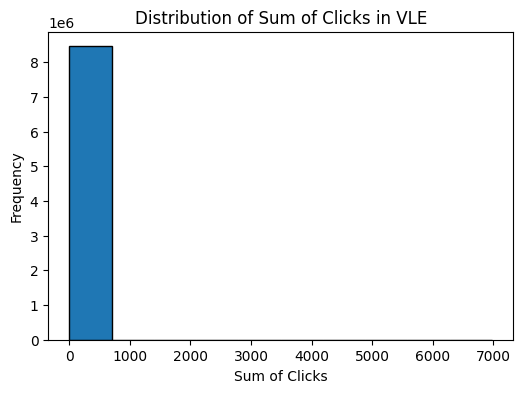

In [50]:
# Histogram for sum_click in the student_vle table
plt.figure(figsize=(6, 4))
student_vle['sum_click'].plot(kind='hist', edgecolor='black')
plt.title('Distribution of Sum of Clicks in VLE')
plt.xlabel('Sum of Clicks')
plt.show()

In [51]:
# Abruf der Interaktionsdaten der Studierenden, die ihr Studium abgebrochen haben
query = "SELECT * FROM student_vle_withdrawn"
rows = session.execute(query)
withdrawn_student_interactions = list(rows)

InvalidRequest: Error from server: code=2200 [Invalid query] message="table student_vle_withdrawn does not exist"

In [ ]:

# Remember to close the connection when finished
cluster.shutdown()